https://www.kaggle.com/competitions/digit-recognizer

VotingClassifier (LGBM, XGBoost, HistGradientBoost, RandomForest) : 0.97503

In [ ]:
import numpy as np
import pandas as pd

#train = pd.read_csv('train.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝/train.csv')

In [ ]:
x_train = train.drop('label', axis = 1).values
y_train = train['label'].values

In [ ]:
x_train.shape

(42000, 784)

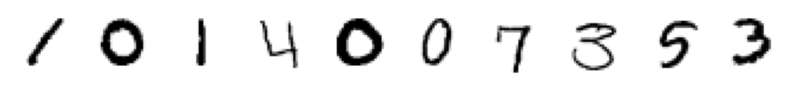

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols = 10, figsize = (10, 1))
axs = axs.flatten()

for i in range(10):
    plt.sca(axs[i])
    plt.imshow(x_train[i].reshape(28, -1), cmap = 'binary')
    plt.axis('off')

plt.show()

In [ ]:
x_train = x_train / 255

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [ ]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
import time

lgb_clf = lgb.LGBMClassifier(random_state = 42, verbose = -1)
xgb_clf = xgb.XGBClassifier(random_state = 42)
et_clf = ExtraTreeClassifier(random_state = 42)
rf_clf = RandomForestClassifier(random_state = 42)
hgb_clf = HistGradientBoostingClassifier(random_state = 42)
svc_clf = SVC(random_state = 42)

_ = time.time()
lgb_clf.fit(x_train, y_train)
print('lgb', time.time() - _)

_ = time.time()
xgb_clf.fit(x_train, y_train)
print('xgb', time.time() - _)

_ = time.time()
et_clf.fit(x_train, y_train)
print('et', time.time() - _)

_ = time.time()
rf_clf.fit(x_train, y_train)
print('rf', time.time() - _)

_ = time.time()
hgb_clf.fit(x_train, y_train)
print('hgb', time.time() - _)

_ = time.time()
svc_clf.fit(x_train, y_train)
print('svc', time.time() - _)

pred1 = lgb_clf.predict(x_test)
pred2 = xgb_clf.predict(x_test)
pred3 = et_clf.predict(x_test)
pred4 = rf_clf.predict(x_test)
pred5 = hgb_clf.predict(x_test)
pred6 = svc_clf.predict(x_test)

print()
print(accuracy_score(y_test, pred1))
print(accuracy_score(y_test, pred2))
print(accuracy_score(y_test, pred3))
print(accuracy_score(y_test, pred4))
print(accuracy_score(y_test, pred5))
print(accuracy_score(y_test, pred6))

lgb 113.41137599945068
xgb 361.5230767726898
et 0.2785806655883789
rf 27.84820532798767
gb 351.5270643234253

0.973452380952381
0.9739285714285715
0.8026190476190476
0.9629761904761904
0.9733333333333334


In [ ]:
from sklearn.ensemble import VotingClassifier

vot_clf = VotingClassifier(estimators = [
    ('xgb', xgb.XGBClassifier(random_state = 42)),
    ('lgb', lgb.LGBMClassifier(random_state = 42, verbose = -1)),
    ('hgb', HistGradientBoostingClassifier(random_state = 42)),
    ('rf', RandomForestClassifier(random_state = 42))],
                           voting = 'soft',
                           weights = [0.973452380952381, 0.9739285714285715, 0.9733333333333334, 0.9629761904761904])

vot_clf.fit(x_train, y_train)
vot_pred = vot_clf.predict(x_test)
accuracy_score(y_test, vot_pred)

0.9753571428571428

In [ ]:
x_train = train.drop('label', axis = 1).values
y_train = train['label'].values

x_train = x_train / 255

x_train = x_train.reshape(x_train.shape[0], -1)

vot_clf = VotingClassifier(estimators = [
    ('xgb', xgb.XGBClassifier(random_state = 42)),
    ('lgb', lgb.LGBMClassifier(random_state = 42, verbose = -1)),
    ('hgb', HistGradientBoostingClassifier(random_state = 42)),
    ('rf', RandomForestClassifier(random_state = 42))],
                           voting = 'soft',
                           weights = [0.973452380952381, 0.9739285714285715, 0.9733333333333334, 0.9629761904761904])

vot_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lgb',
                              LGBMClassifier(random_state=42, verbose=-1)),
                             ('hgb',
                              HistGradientBoostingClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42))],
                 voting='soft',
                 weights=[0.973452380952381, 0.9739285714285715,
                          0.9733333333333334, 0.9629761904761904])

In [ ]:
x_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝/test.csv')
x_test = x_test.values
x_test = x_test / 255

final_pred = vot_clf.predict(x_test)

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝/sample_submission.csv')

submission['Label'] = final_pred
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝/submission.csv', index = False)